# Inteligência Artificial - Projeto da 2ª Unidade

Equipe: Dhiego Fernando, Liana Carvalho e Luiz Henrique

Base de Dados escolhida: Classificação Estelar (Stellar Classification Dataset - SDSS17)

Tipo de Tarefa: Classificação

## 1. Escolha e Importação da Base de Dados

- A base de dados de Classificação Estelar visa classificar estrelas, galáxias e quasares com base em suas características espectrais como comprimentos de ondas, coordenadas celestiais e etc.

- https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download

-  Utiliza paradigma de aprendizagem supervisionada. Trabalha com classificação multiclasse, onde irá categorizar em três classes: estrelas, galáxias e quasares.

In [1]:
# É necessário fazer o download da database no link acima e, após isso, inserir o documento
# na pasta Colab Notebooks que encontra-se no drive
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/star_classification.csv')

print(df.head())

Mounted at /content/drive
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354     

## 2. Análise Exploratória de Dados (EDA)

In [2]:
#Informa a quantidade de Linhas e Colunas presentes na Database
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [3]:
# Informa os dados nulos e duplicados da database
print("Dados Nulos Database:");
print(df.isnull().sum());
print("\nDados Duplicados Database:");
print(df.duplicated().sum());

Dados Nulos Database:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Dados Duplicados Database:
0


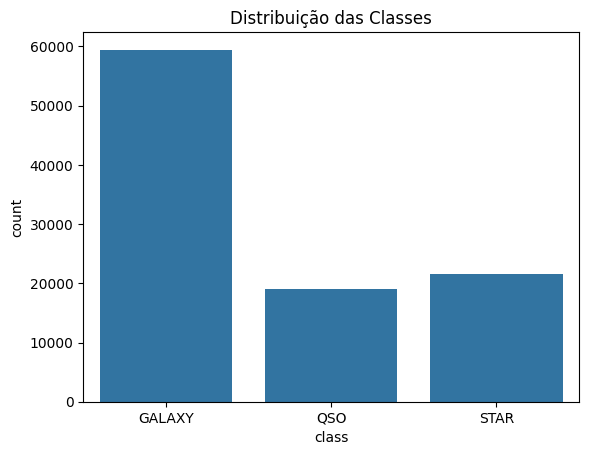

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição das Classes da database
sns.countplot(x= "class", data=df)
plt.title("Distribuição das Classes")
plt.show()

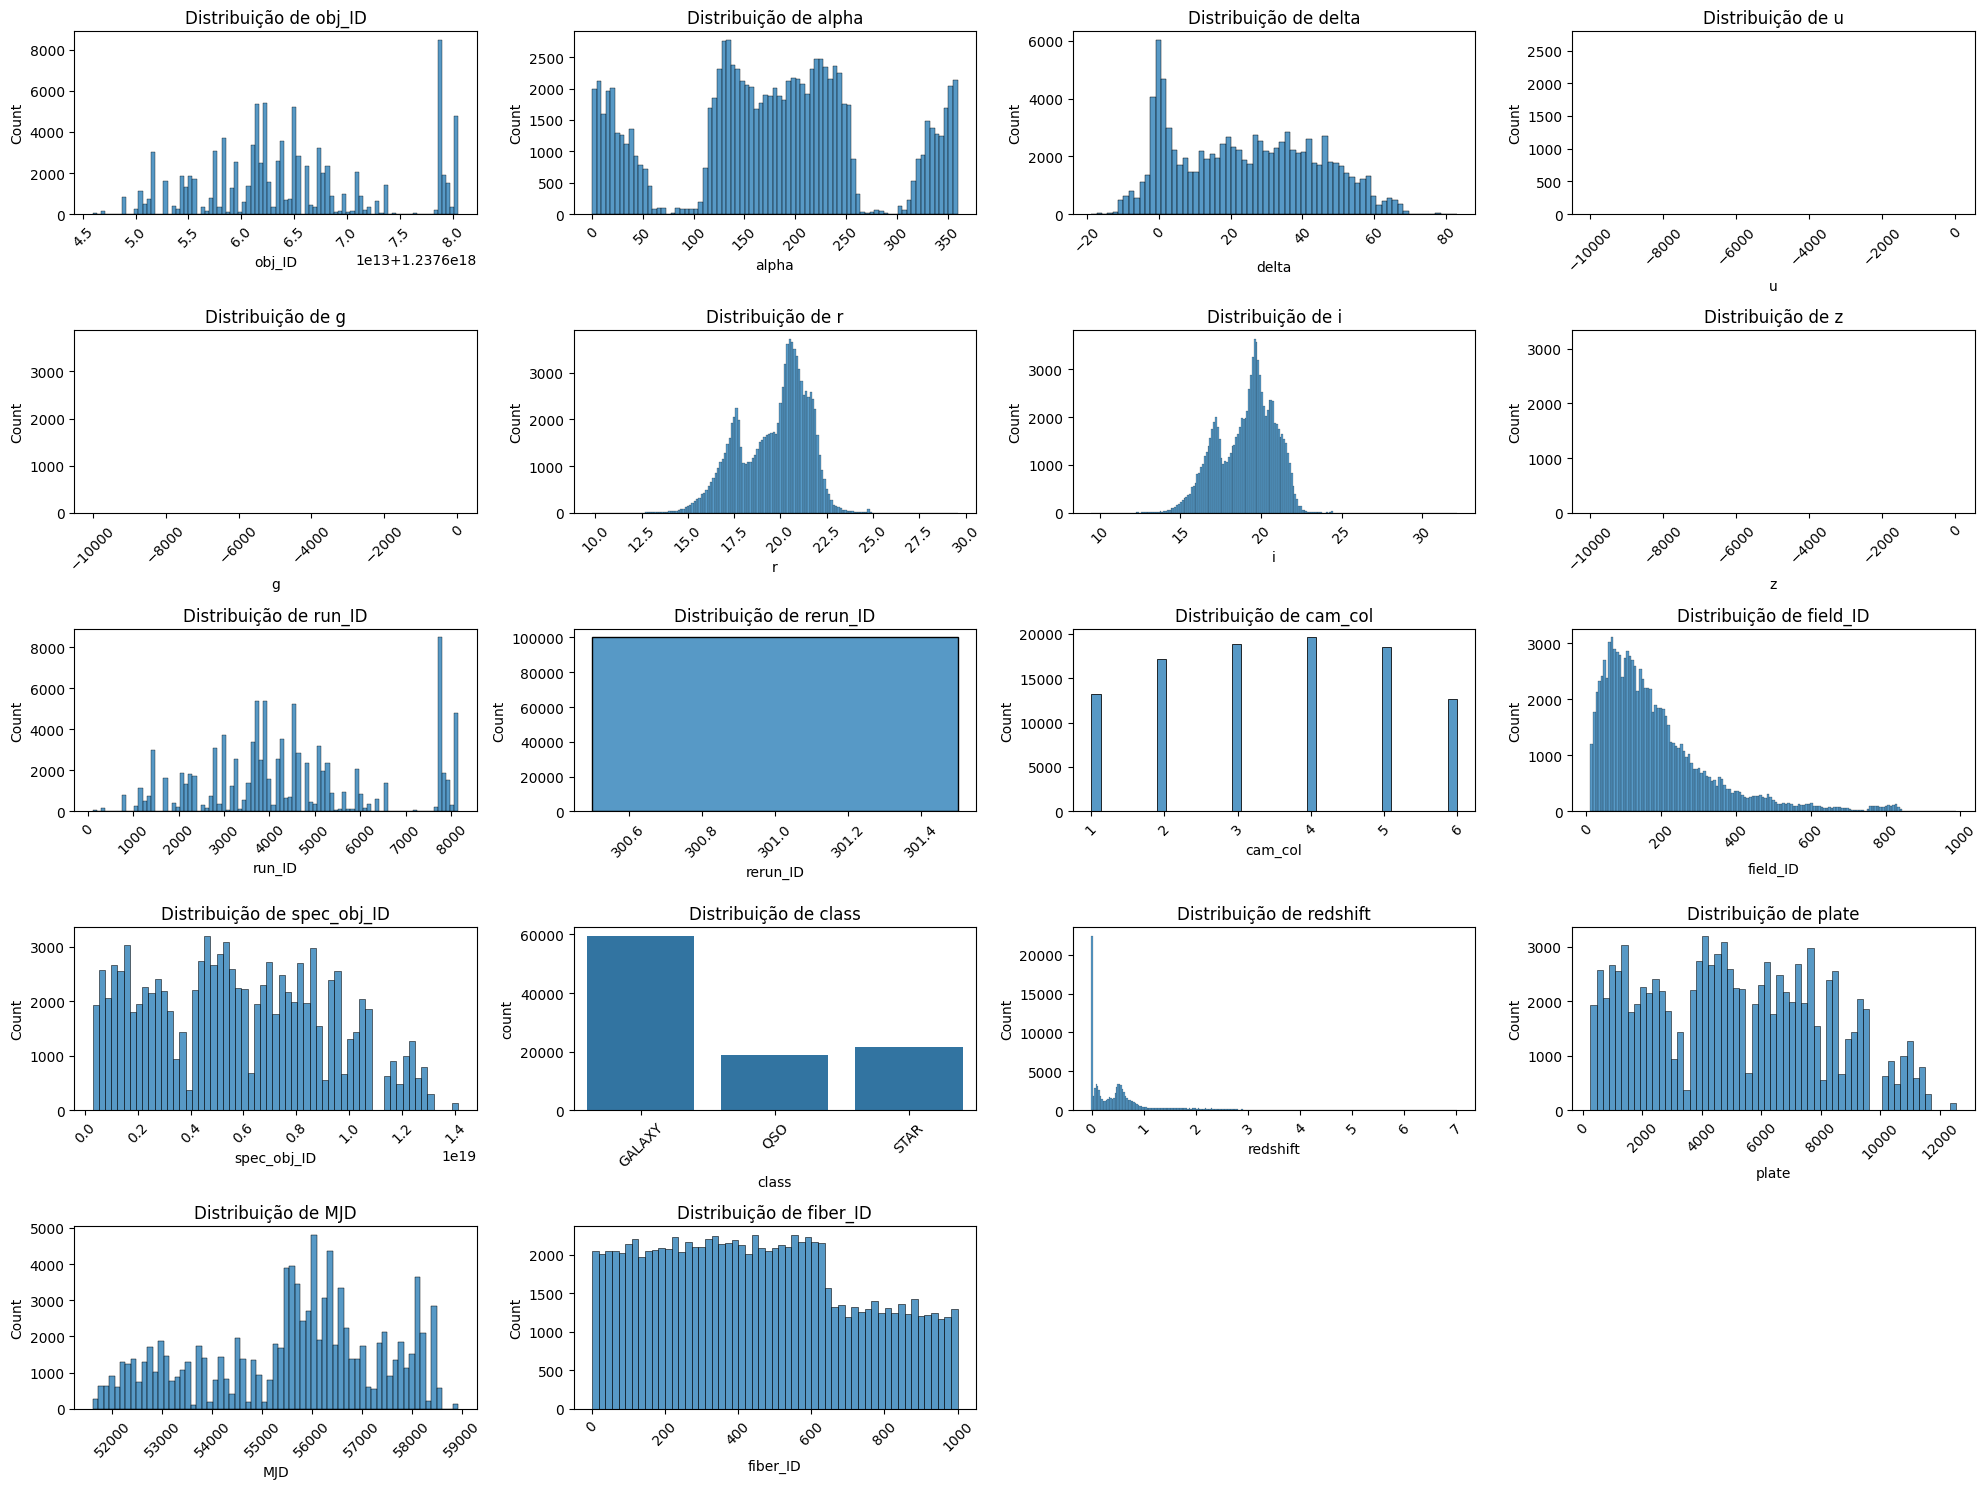


Estatísticas descritivas:
             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.9

In [ ]:
#Distribuição de dados das 18 colunas.

todas_colunas = df.columns
plt.figure(figsize=(20, 15))

for i, coluna in enumerate(todas_colunas, 1):
    plt.subplot(5, 4, i)


    if df[coluna].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=coluna)

    else:
        sns.countplot(data=df, x=coluna)

    plt.title(f'Distribuição de {coluna}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nEstatísticas descritivas:")
print(df.describe())

In [ ]:
# Converte as Classes para Números
df['class'] = df['class'].map({'GALAXY':0, 'QSO':1, 'STAR':2})

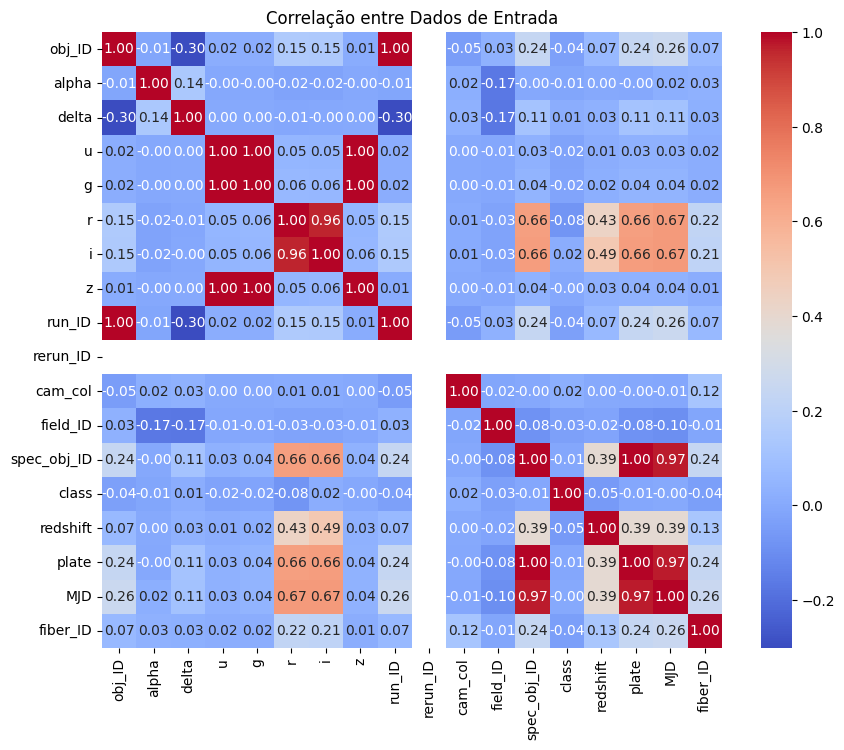


 Correlação entre Entradas e Saída:

obj_ID        -0.036012
alpha         -0.011756
delta          0.014452
u             -0.024645
g             -0.020066
r             -0.076766
i              0.015028
z             -0.001614
run_ID        -0.036014
rerun_ID            NaN
cam_col        0.023138
field_ID      -0.034833
spec_obj_ID   -0.010060
class          1.000000
redshift      -0.054239
plate         -0.010060
MJD           -0.000405
fiber_ID      -0.041586
Name: class, dtype: float64


In [ ]:
#|Correlação das entradas| < 5 = fraca, 5 > e <7 = média, > 7 = forte
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlação entre Dados de Entrada')
plt.show()

print("\n Correlação entre Entradas e Saída:\n")
print(df.corr()['class'])

### 2.1. Achados da Análise Exploratória:

 Nesta seção foram observadas as seguintes características acerca da database escolhida:

-    DataBase possui ao todo 18 colunas e 100.000 linhas.

- DataBase não possui dados nulos/faltantes e nem dados duplicados.

- Os dados são atribuídos a três classes principais sendo elas: GALAXY, QSO e STAR.

- A maioria dos dados de entrada possuem Baixa correlação entre si.

## 3. Preparação dos Dados

Considerando os achados da EDA elencados acima:

- Apesar da Database possuir mais linhas do que colunas, não se fez necessária a utilização de Seleção de Características, dado que os resultados obtidos utilizando todas as colunas presentes foram satisfatórios.
-
Para tratar os dados categórios encontrados na DataBase utilizamos do Label Encoding, convertendo as categorias em um valor numérico.

## 4. Modelagem e Avaliação de Resultados

- Técnicas utilizadas: Árvore de decisão - Random Forest - Regressão - Redes Neurais Artificiais  -   KNN

- Métricas escolhidas: Acurácia e Matriz de confusão

In [ ]:
# Importar Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Importar Random Forest

from sklearn.ensemble import RandomForestClassifier

#Importar StandardScaler

from sklearn.preprocessing import StandardScaler

#Importar Regressão Logística

from sklearn.linear_model import LogisticRegression

# Importar Redes Neurais Artificiais

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Importar Numpy

import numpy as np

# Importar KNN

from sklearn.neighbors import KNeighborsClassifier

# Importar biblioteca de divisão de treino/teste

from sklearn.model_selection import train_test_split

# Importar biblioteca de Acurácia e Matriz de Confusão

from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Divisão dos Valores e suas devidas Classes
x_values = df.drop(['class'], axis = 1).values
y_values = df['class'].values

print(x_values)
print(y_values)

[[1.23766096e+18 1.35689107e+02 3.24946318e+01 ... 5.81200000e+03
  5.63540000e+04 1.71000000e+02]
 [1.23766488e+18 1.44826101e+02 3.12741849e+01 ... 1.04450000e+04
  5.81580000e+04 4.27000000e+02]
 [1.23766096e+18 1.42188790e+02 3.55824442e+01 ... 4.57600000e+03
  5.55920000e+04 2.99000000e+02]
 ...
 [1.23766830e+18 2.24587407e+02 1.57007074e+01 ... 2.76400000e+03
  5.45350000e+04 7.40000000e+01]
 [1.23766115e+18 2.12268621e+02 4.66603653e+01 ... 6.75100000e+03
  5.63680000e+04 4.70000000e+02]
 [1.23766115e+18 1.96896053e+02 4.94646428e+01 ... 7.41000000e+03
  5.71040000e+04 8.51000000e+02]]
[0 0 0 ... 0 0 0]


In [ ]:
# Divide a database em 70% treinamento e 30% teste
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state= 0)
print("Tamanho Total = ",len(x_values))
print("Tamanho Treinamento = ",len(x_train))
print("Tamanho Testes = ",len(x_test))

Tamanho Total =  100000
Tamanho Treinamento =  70000
Tamanho Testes =  30000


In [ ]:
# Treinamento do Modelo Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Previsões do Modelo Árvore de Decisão
y_train_pred_tree = decision_tree.predict(x_train)
print("Acurácia Treinamento = ",accuracy_score(y_train,y_train_pred_tree) )
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train,y_train_pred_tree))

y_test_pred_tree = decision_tree.predict(x_test)
print("\nAcurácia Teste = ",accuracy_score(y_test,y_test_pred_tree) )
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test,y_test_pred_tree))

Acurácia Treinamento =  1.0
Matriz de Confusão Treinamento = 
[[41636     0     0]
 [    0 13320     0]
 [    0     0 15044]]

Acurácia Teste =  0.9648
Matriz de Confusão Teste = 
[[17247   547    15]
 [  457  5184     0]
 [   36     1  6513]]


In [ ]:
#Treinamento do Modelo Random Forest
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Previsões do Modelo Random Forest
y_train_pred_random = rf.predict(x_train)
y_test_pred_random = rf.predict(x_test)

print("Acurácia Treinamento = ", accuracy_score(y_train, y_train_pred_random))
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train, y_train_pred_random))

print()

print("Acurácia Teste = ", accuracy_score(y_test, y_test_pred_random))
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test, y_test_pred_random))

Acurácia Treinamento =  1.0
Matriz de Confusão Treinamento = 
[[41636     0     0]
 [    0 13320     0]
 [    0     0 15044]]

Acurácia Teste =  0.9781
Matriz de Confusão Teste = 
[[17564   195    50]
 [  402  5238     1]
 [    9     0  6541]]


In [ ]:
# Padronização dos Dados com StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Treinamento do Modelo Regressão Logística
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#Previsões do Modelo Regressão Logística
y_train_pred_regression = logistic_model.predict(x_train)
y_test_pred_regression = logistic_model.predict(x_test)

print("Acurácia Treinamento = ", accuracy_score(y_train, y_train_pred_regression))
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train, y_train_pred_regression))

print()

print("Acurácia Teste = ", accuracy_score(y_test, y_test_pred_regression))
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test, y_test_pred_regression))

Acurácia Treinamento =  0.9577714285714286
Matriz de Confusão Treinamento = 
[[40243   629   764]
 [ 1551 11762     7]
 [    1     4 15039]]

Acurácia Teste =  0.9577666666666667
Matriz de Confusão Teste = 
[[17205   276   328]
 [  652  4984     5]
 [    1     5  6544]]


In [ ]:
#Treinamento do Modelo Redes Neurais Artificiais

y_train_one_hot = to_categorical(y_train, num_classes=3)

neural_network = Sequential()
neural_network.add(Dense(32, activation='relu'))
neural_network.add(Dense(3, activation='softmax'))
neural_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
neural_network.fit(x_train, y_train_one_hot)

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8109 - loss: 0.5068


In [ ]:
#Previsões do Modelo Redes Neurais Artificiais
y_train_pred_neural = neural_network.predict(x_train)
y_test_pred_neural = neural_network.predict(x_test)

y_train_pred_class = np.argmax(y_train_pred_neural, axis=1)
y_test_pred_class = np.argmax(y_test_pred_neural, axis=1)

print("Acurácia Treinamento = ", accuracy_score(y_train, y_train_pred_class))
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train, y_train_pred_class))

print()

print("Acurácia Teste = ", accuracy_score(y_test, y_test_pred_class))
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test, y_test_pred_class))

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Acurácia Treinamento =  0.9364428571428571
Matriz de Confusão Treinamento = 
[[39526   525  1585]
 [ 1293 11981    46]
 [  991     9 14044]]

Acurácia Teste =  0.9378
Matriz de Confusão Teste = 
[[16905   236   668]
 [  532  5088    21]
 [  407     2  6141]]


In [ ]:
# Treinamento do Modelo KNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Previsões do Modelo KNN
y_train_pred_knn = classifier.predict(x_train)
y_test_pred_knn = classifier.predict(x_test)

print("Acurácia Treinamento = ", accuracy_score(y_train, y_train_pred_knn))
print("Matriz de Confusão Treinamento = ")
print(confusion_matrix(y_train, y_train_pred_knn))

print()

print("Acurácia Teste = ", accuracy_score(y_test, y_test_pred_knn))
print("Matriz de Confusão Teste = ")
print(confusion_matrix(y_test, y_test_pred_knn))

Acurácia Treinamento =  0.9346
Matriz de Confusão Treinamento = 
[[40546   317   773]
 [ 1197 11961   162]
 [ 2074    55 12915]]

Acurácia Teste =  0.9161333333333334
Matriz de Confusão Teste = 
[[17207   185   417]
 [  586  4970    85]
 [ 1207    36  5307]]


### 4.1. Otimização de Hiperparâmetros

- Os Resultados obtidos com a configuração padrão foram satisfatórios nos modelos Random Forest e Árvore de Decisão, entretanto, nos demais modelos houve uma baixa acurácia, dessa forma, tornou-se necessário a padronização dos dados através do StandardScaler para os modelos restantes, após isso os resultados obtidos nos demais modelos passaram a serem satisfatórios, dessa forma, não foi necessário a utilização de Hiperparâmetros.

## 5. Discussão dos Resultados

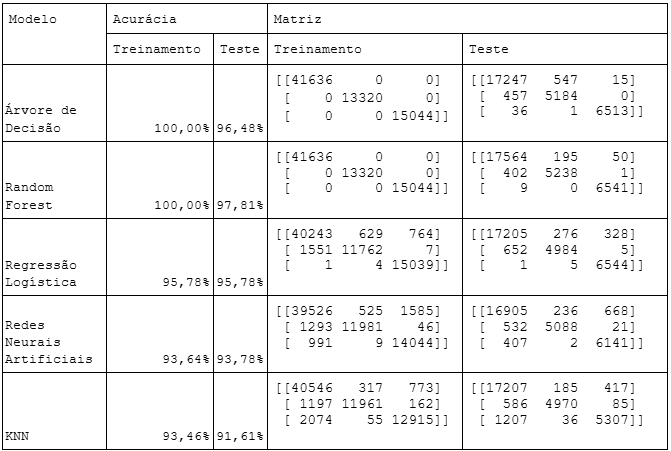

- Com base nos resultados alcançados recomendamos o modelo Random Forest, uma vez que apresentou a melhor desempenho no teste em comparação com os outros modelos, alcançando uma taxa de 97,81%.

- O Random Forest cria um conjunto de árvores de decisão a partir de um subconjunto selecionado aleatoriamente do conjunto de treinamento. Este modelo se destaca pela sua praticidade e eficiência, especialmente na manipulação de conjuntos de dados extensos e complexos, mantendo uma elevada precisão nas previsões.

- Embora apresente 100% de acurácia no treinamento, isto não necessariamente configura overfitting, visto que a diferença entre treinamento e teste é mínima.

- Portanto, o modelo Random Forest oferece uma ótima capacidade de generalização para este cenário.